# Spam Base 

## Defining the question 

### Specifying the question 

We would like to use Naive Bayes to identify whether a message should be classified as spam or not

### Defining the metric for success

The metric for success would be getting an accuracy score of 90% and above 

### Understanding the context 

Factors such as the words in a message the number and the number of captial letters in a message lead us to identify whether a message is spam or not. Luckily we have those encoded for us in this dataset and hence we can see if there are spams or not. 

### Recording the experimental deisgn 

We will use the following order to accomplish our goal : 

1.   Read the dataset 
1.   Check the dataset 
1.   Clean the dataset 
2.   Perform exploratory analysis 
2.   Implement our solution
2.   Challenge our solution 



## Reading the data 

In [1]:
# Importing the neccessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Using pandas to read the dataset 
df = pd.read_csv('/content/spambase.data.csv')

## Checking the data

In [3]:
# Checking the top of the dataset 
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
# Checking the bottom of the dataset 
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
# Checking the size of the dataset 
df.shape

(4600, 58)

In [6]:
# Checking the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

## Cleaning the data 

### General Cleaning 

In [7]:
# Checking if there are missing values 
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [8]:
#Checking if all the columns have the right datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [9]:
# Checking if there are duplicates
df.duplicated().sum()

391

In [10]:
# Viewing the duplicates 
duplicate = df[df.duplicated()]
duplicate

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
25,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
102,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
103,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
104,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
105,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4440,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4536,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4540,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,8.33,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [11]:
# ddropping the duplicates 
duplicate.drop_duplicates()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
25,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.44,0.00,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.00,5.466,22,82,1
102,0.00,0.0,0.64,0.0,0.0,0.64,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.00,10.068,131,292,1
103,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,3.33,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.00,5.500,22,66,1
119,0.05,0.3,0.40,0.0,0.1,0.05,0.0,0.05,0.1,0.00,0.0,0.30,0.2,0.0,0.05,0.00,0.0,0.50,1.55,0.3,0.75,0.0,0.15,0.2,0.05,0.05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.05,0.05,0.00,0.0,0.0,0.000,0.045,0.000,0.054,0.118,0.00,2.370,96,588,1
120,0.05,0.3,0.40,0.0,0.1,0.05,0.0,0.05,0.1,0.00,0.0,0.30,0.2,0.0,0.05,0.00,0.0,0.50,1.55,0.3,0.75,0.0,0.15,0.2,0.05,0.05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.05,0.05,0.00,0.0,0.0,0.000,0.036,0.000,0.054,0.118,0.00,2.379,96,583,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4008,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,1.72,0.0,0.00,0.0,0.00,0.0,6.89,3.44,0.0,0.0,0.0,3.44,0.0,0.0,0.0,0.0,1.72,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,2.160,11,54,0
4343,0.00,0.6,0.00,0.0,0.6,0.00,0.0,0.00,0.0,2.43,0.0,0.60,0.0,0.0,0.00,0.00,0.0,0.00,1.82,0.0,0.60,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,1.21,0.0,0.00,0.00,1.82,0.0,0.0,0.000,0.271,0.000,0.000,0.000,0.09,6.090,71,201,0
4345,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,14.28,0.0,7.14,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,7.14,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,1.000,1,3,0
4438,0.00,0.0,0.74,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.24,0.0,0.0,0.00,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.24,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.49,0.00,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.00,2.587,55,282,0


### Checking for outliers and anomalies 

In [14]:
# Checking for anomalies 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
mask

0         1053
0.64       897
0.64.1     338
0.1         47
0.32       501
0.2        999
0.3        807
0.4        824
0.5        773
0.6        852
0.7        709
0.64.2     270
0.8        852
0.9        357
0.10       336
0.32.1     956
0.11       963
1.29      1037
1.93        75
0.12       424
0.96       229
0.13       117
0.14       679
0.15       735
0.16      1090
0.17       811
0.18       780
0.19       463
0.20       372
0.21       469
0.22       293
0.23       205
0.24       405
0.25       215
0.26       485
0.27       599
0.28       829
0.29        83
0.30       384
0.31       453
0.32.2     148
0.33       341
0.34       375
0.35       327
0.36      1001
0.37       517
0.38        63
0.39       203
0.40       790
0.41       296
0.42       529
0.778      413
0.43       811
0.44       750
3.756      363
61         463
278        551
1            0
dtype: int64

In [13]:
# Checking what percentage of the data the anomalies occupy 
percentage = (mask / df.shape[0]) * 100
percentage.sum()

667.5434782608696

## Exploratory Analysis 

### Univariate analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


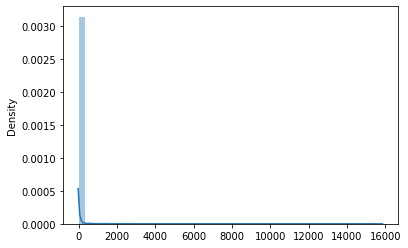

In [16]:
sns.distplot(df)

In [17]:
df.skew()

0          5.675025
0.64      10.086283
0.64.1     3.009807
0.1       26.224884
0.32       4.746618
0.2        5.956325
0.3        6.764849
0.4        9.723843
0.5        5.225474
0.6        8.487038
0.7        5.509622
0.64.2     2.867128
0.8        6.954817
0.9       11.753373
0.10       6.970243
0.32.1    10.762507
0.11       5.688013
1.29       5.420216
1.93       1.591611
0.12      14.601026
0.96       2.435356
0.13       9.974326
0.14       5.713128
0.15      14.685513
0.16       5.716217
0.17       6.349318
0.18       5.743821
0.19       6.605784
0.20      11.368992
0.21       6.635260
0.22      12.667708
0.23      10.548016
0.24      13.188642
0.25      10.474021
0.26      15.229225
0.27       7.672620
0.28       5.322891
0.29      28.260140
0.30      12.055614
0.31       9.146019
0.32.2    12.586515
0.33       9.454708
0.34       7.628372
0.35      18.769493
0.36       9.145176
0.37      10.121565
0.38      19.865520
0.39      19.718312
0.40      13.707142
0.41      13.583145


In [18]:
df.kurt()

0           49.294680
0.64       105.631955
0.64.1      13.310616
0.1        726.292795
0.32        37.932330
0.2         68.431738
0.3         75.397597
0.4        169.128434
0.5         46.930209
0.6        161.186086
0.7         39.641894
0.64.2      12.547742
0.8         84.924560
0.9        229.152157
0.10        57.714291
0.32.1     196.383129
0.11        45.663797
1.29        48.052430
1.93         5.255891
0.12       382.920673
0.96         9.007245
0.13       109.117632
0.14        46.797425
0.15       301.993471
0.16        43.594067
0.17        63.886818
0.18        34.196098
0.19        58.359797
0.20       175.210056
0.21        51.994767
0.22       254.177773
0.23       127.348071
0.24       296.025373
0.25       125.915195
0.26       449.281145
0.27        81.189522
0.28        42.611712
0.29       911.847010
0.30       215.671872
0.31        99.364385
0.32.2     193.576531
0.33       115.680318
0.34        78.554783
0.35       479.727403
0.36       128.838754
0.37      

In [19]:
df.mode()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,0


In [20]:
df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


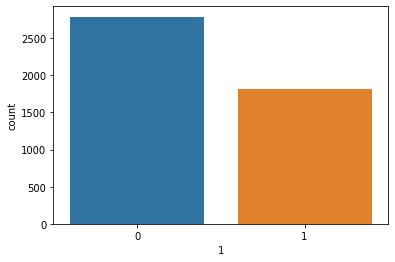

In [21]:
sns.countplot(df['1'])

### Bivariate Analysis 

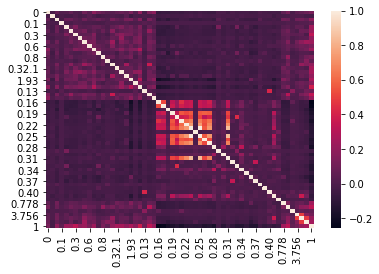

In [22]:
# Getting the correlation of the columns 
sns.heatmap(df.corr())

## Implementing the soloution 

### Round 1 :

#### Preparing the data 

In [23]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [24]:
# Splitting to features and labels 
X = df.drop('1',axis=1)
y = df['1']

In [25]:
# We deal with class imbalance by over sampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)
print(x_ros.shape,y_ros.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


(5576, 57) (5576,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.2,random_state=0)

#### Modelling 

In [27]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)

In [29]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7992831541218638

In [30]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[482  89]
 [135 410]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       571
           1       0.82      0.75      0.79       545

    accuracy                           0.80      1116
   macro avg       0.80      0.80      0.80      1116
weighted avg       0.80      0.80      0.80      1116



### ROund 2 :

#### Preparing the data 

In [31]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=0)

#### Modelling 

In [32]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [33]:
y_pred = model.predict(X_test)

In [34]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8015540944411237

In [35]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[700 145]
 [187 641]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       845
           1       0.82      0.77      0.79       828

    accuracy                           0.80      1673
   macro avg       0.80      0.80      0.80      1673
weighted avg       0.80      0.80      0.80      1673



### Round 3 : 


#### Preparing the data 

In [36]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.1,random_state=0)

#### Modelling 

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_test)

In [39]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7867383512544803

In [40]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[226  49]
 [ 70 213]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       275
           1       0.81      0.75      0.78       283

    accuracy                           0.79       558
   macro avg       0.79      0.79      0.79       558
weighted avg       0.79      0.79      0.79       558



### Optimising the performance 

We will do this by dropping highly correlated columns 

In [41]:
# Creating a correlation matrix
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Finding the index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [44]:
W = df.drop(df[to_drop], axis=1)
W

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [45]:
# Doing feature selection with our new dataset 
X = W.drop('1',axis=1)
y = W['1']

In [46]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=0)

In [47]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [48]:
y_pred = model.predict(X_test)

In [49]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8015540944411237

In [50]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[700 145]
 [187 641]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       845
           1       0.82      0.77      0.79       828

    accuracy                           0.80      1673
   macro avg       0.80      0.80      0.80      1673
weighted avg       0.80      0.80      0.80      1673



## Challenging the soloution 

Instead of using over sampling we could try and use under sampling to see if we get better scores 

In [51]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [53]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=0.3,random_state=0)

In [54]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [55]:
y_pred = model.predict(X_test)

In [56]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7821691176470589

In [57]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[437 123]
 [114 414]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       560
           1       0.77      0.78      0.78       528

    accuracy                           0.78      1088
   macro avg       0.78      0.78      0.78      1088
weighted avg       0.78      0.78      0.78      1088



## Our findings 

Messages are more likely to be classified as spam and rather than not.